In [ ]:
# Perguntas dessa tarefa
# Qual o valor total de MacBook Pro vendidos?
# 
# Qual o produto mais vendido?
# 
# Qual o total de vendas do mês de setembro? (09)
# 
# Qual a média de vendas da cidade de Dallas?
# 
# Qual o horário de pico de vendas?


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 



In [2]:
# abrindo o arquivo
arquivo = pd.read_csv("DADOS/Sales Data.csv")

In [ ]:
# dando uma olhada no arquivo 
arquivo.head(20)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,11


In [ ]:
# vendo quais produtos são vendidos .
print(arquivo['Product'].unique())

['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'LG Dryer']


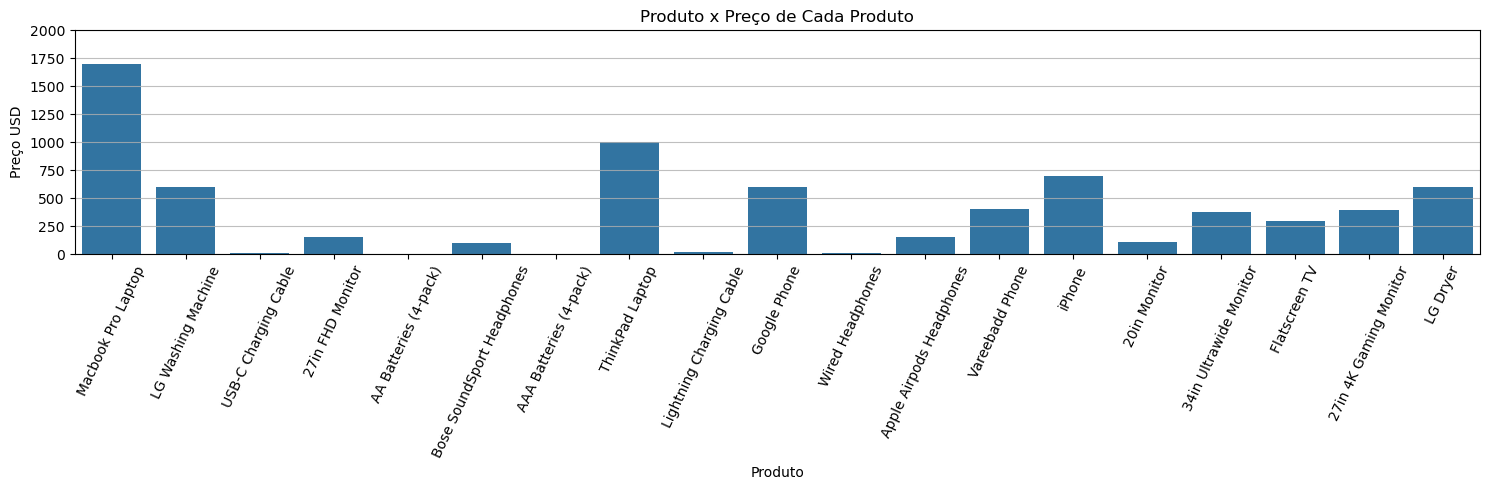

In [ ]:
# verificando valor dos produtos  dos produtos em gŕaifco de barras.
plt.figure(figsize= (15,5)) # definindo o tamanho da figura 
sns.barplot(x = 'Product' , y = (('Price Each')) , data = arquivo)
plt.title("Produto x Preço de Cada Produto")
plt.xlabel("Produto")
plt.ylabel("Preço USD")
plt.ylim(0,2000)
plt.grid( alpha= 0.8, axis='y' )
plt.xticks(rotation = 65)
plt.tight_layout()

### Com base no gráfico acima sabesmo que o produto de preço mais alto é o macbook pro, com preço de 1700 dolares

In [36]:
# criando um novo data frame com um groupby dos produtos para realizar a soma 
arquivos_novos  = arquivo.groupby(arquivo['Product']).agg({
    "Price Each" : ["mean"],
    "Sales" : "sum",
    "Quantity Ordered" : "sum"
     }
).reset_index()
arquivos_novos.columns = ['Produto','Preço','Total Vendas',  'Quantidade Vendida']
arquivos_novos 

,Produto,Preço,Total Vendas,Quantidade Vendida
0,20in Monitor,109.99,454148.71,4129
1,27in 4K Gaming Monitor,389.99,2435097.56,6244
2,27in FHD Monitor,149.99,1132424.50,7550
3,34in Ultrawide Monitor,379.99,2355558.01,6199
4,AA Batteries (4-pack),3.84,106118.40,27635
5,AAA Batteries (4-pack),2.99,92740.83,31017
6,Apple Airpods Headphones,150.00,2349150.00,15661
7,Bose SoundSport Headphones,99.99,1345565.43,13457
8,Flatscreen TV,300.00,1445700.00,4819
9,Google Phone,600.00,3319200.00,5532


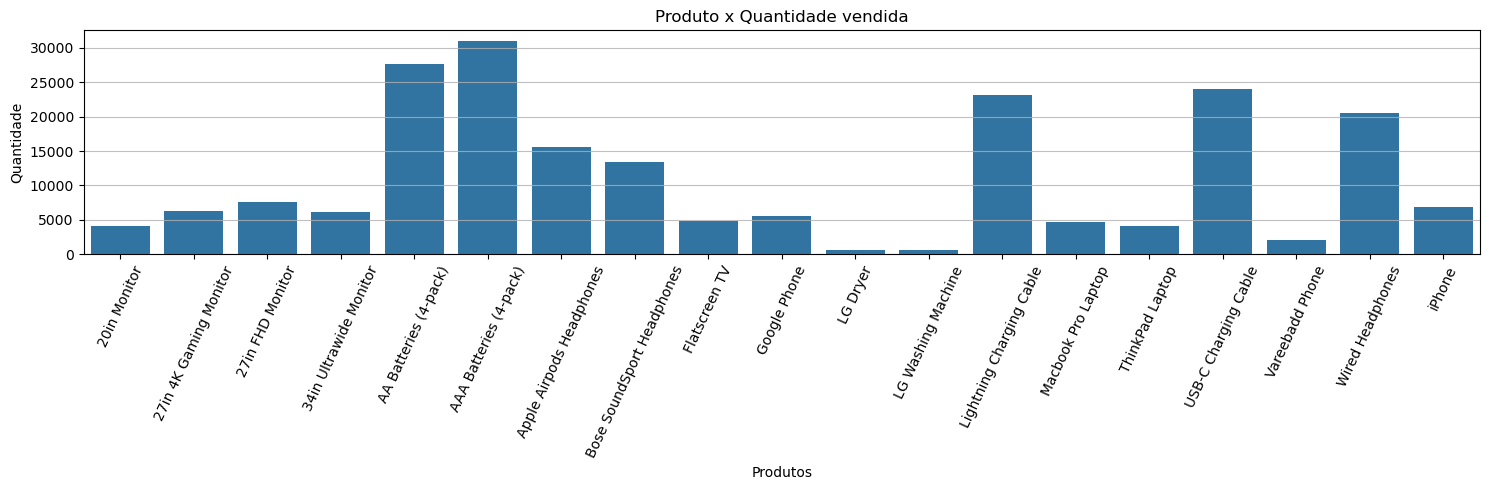

In [26]:
# verificando qual o produto que mais foi vendido e o que gerou mais "lucro" para as lojas
# arquivos_novos.head()
plt.figure(figsize= (15,5))
sns.barplot(x ="Produto",y = "Quantidade Vendida", data = arquivos_novos)

plt.title("Produto x Quantidade vendida")
plt.xlabel("Produtos")
plt.ylabel("Quantidade")
plt.grid( alpha= 0.8, axis='y' )
plt.xticks(rotation = 65)
plt.tight_layout()


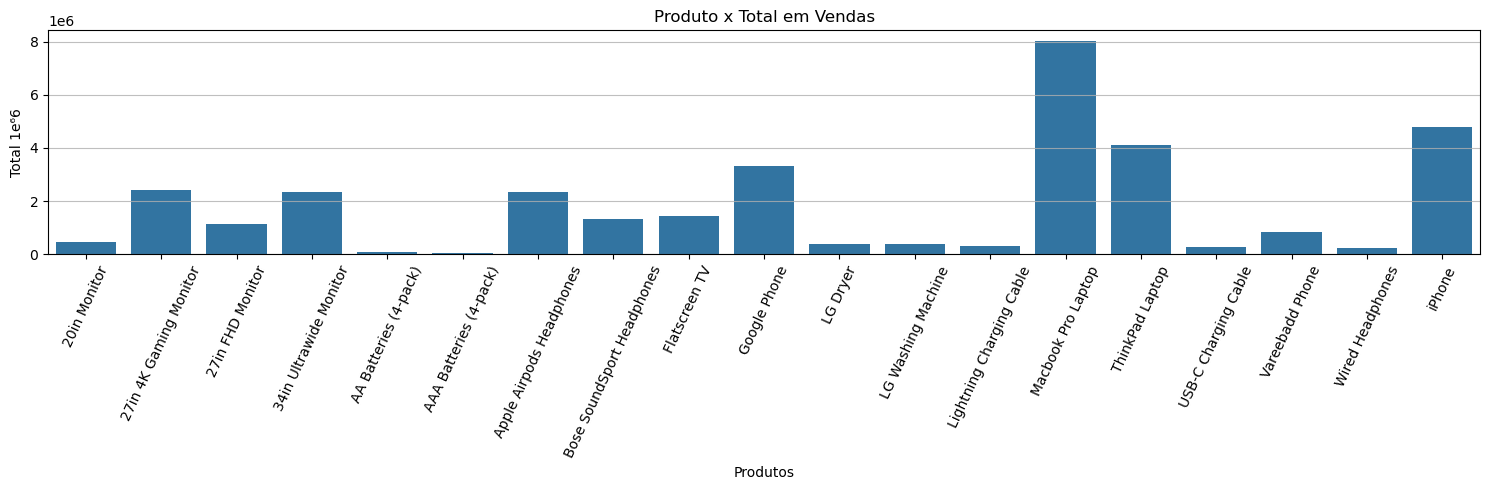

In [28]:
# plot de produtos mais vendidos
plt.figure(figsize= (15,5))
sns.barplot(x ="Produto",y = "Total Vendas", data = arquivos_novos)
plt.title("Produto x Total em Vendas")
plt.xlabel("Produtos")
plt.ylabel("Total 1e⁶6")
plt.grid( alpha= 0.8, axis='y' )
plt.xticks(rotation = 65)
plt.tight_layout()



Na tabela e gráficos acima podemos responder as perguntas em relação a quantidade e valor total dos macbooks vendidos  
sendo um total de 4728 unidades e masis de 8030800.00.    
No entanto o produto mais vendido foram as pilhas aaa que venderam mais de 30 mil unidades  


In [ ]:
# Media de venda e plot das medias por cidade 
Medias = arquivo.groupby(['City', "Month"]).agg({
    "Sales": "mean"
    
}).reset_index()
#ajustando o limite para o display
# pd.set_option('display.max_rows', 200)
# print(Medias)
# Medias.head(20)

Text(0, 0.5, ' ')

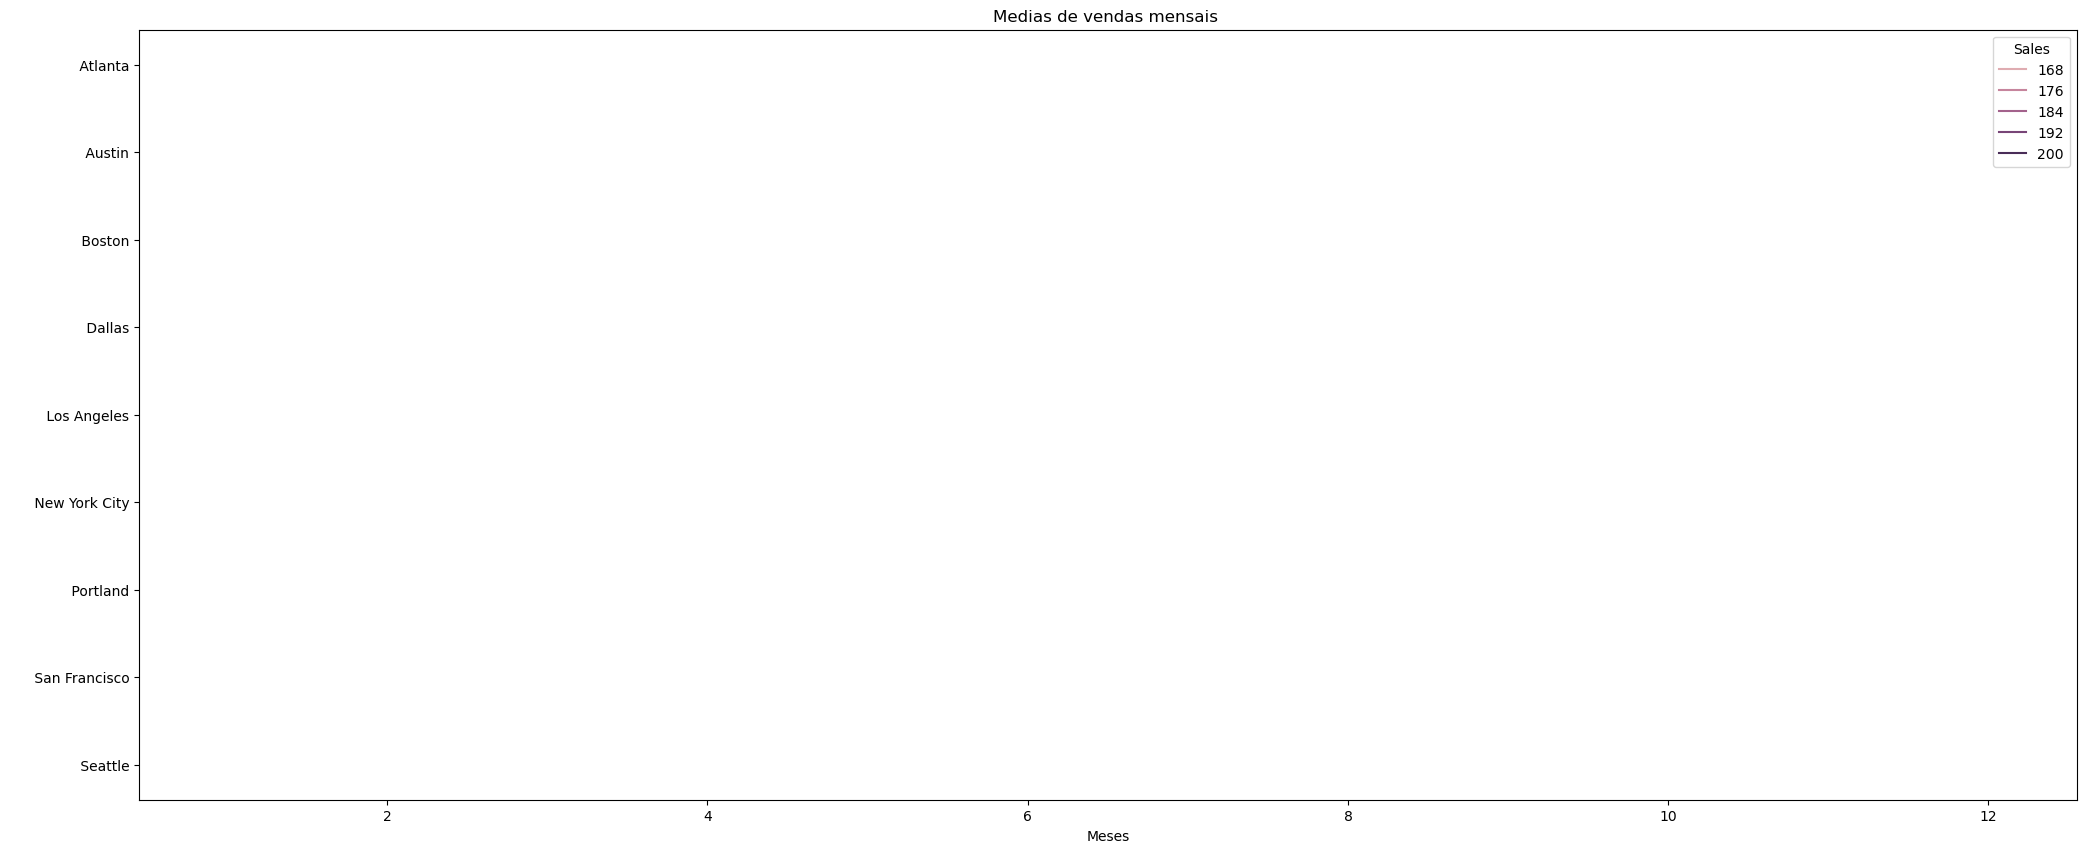

In [96]:
plt.figure(figsize=(25,10))
sns.lineplot(x = 'Month', y = 'City', hue = 'Sales', data= Medias) 
plt.title("Medias de vendas mensais ")
plt.xlabel("Meses")
plt.ylabel(" ")
# plt.xticks(rotation = )

In [106]:
# Juntando por mes para descobrit a media de pedidos por mes em todas aas lojas 
Medias_mes = arquivo.groupby([ "Month"]).agg({
    "Sales": "mean",
    "Quantity Ordered" : ["sum"]
}).reset_index()

In [107]:
Medias_mes

,Month,Sales,Quantity Ordered
,,mean,sum
0,1,187.687376,10903
1,2,183.884962,13449
2,3,185.250471,17005
3,4,185.495390,20558
4,5,190.305852,18667
5,6,190.187565,15253
6,7,185.249826,16072
7,8,187.648849,13448
8,9,180.497387,13109


In [108]:
# Juntando porhora para analisar em qual hora ocorre o pico de vendas 
Medias_hora = arquivo.groupby([ "Hour"]).agg({
    "Sales": "mean",
    "Quantity Ordered" : ["sum"]
}).reset_index()
Medias_hora

,Hour,Sales,Quantity Ordered
,,mean,sum
0,0,182.537409,4428
1,1,196.113566,2619
2,2,188.939212,1398
3,3,175.400590,928
4,4,190.469567,937
5,5,174.625148,1493
6,6,180.545125,2810
7,7,185.702847,4556
8,8,190.592866,7002


In [109]:
# dallas = arquivo[arquivo['City'] == ' Dallas']
Medias_Cidade = arquivo.groupby([ "City"]).agg({
    "Sales": "mean",
    "Quantity Ordered" : ["sum"]
}).reset_index()
Medias_Cidade

,City,Sales,Quantity Ordered
,,mean,sum
0,Atlanta,187.856903,16602
1,Austin,183.703357,11153
2,Boston,183.688272,22528
3,Dallas,186.772969,16730
4,Los Angeles,184.177362,33289
5,New York City,187.502711,27932
6,Portland,186.160498,14053
7,San Francisco,184.704550,50239
8,Seattle,186.516120,16553


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

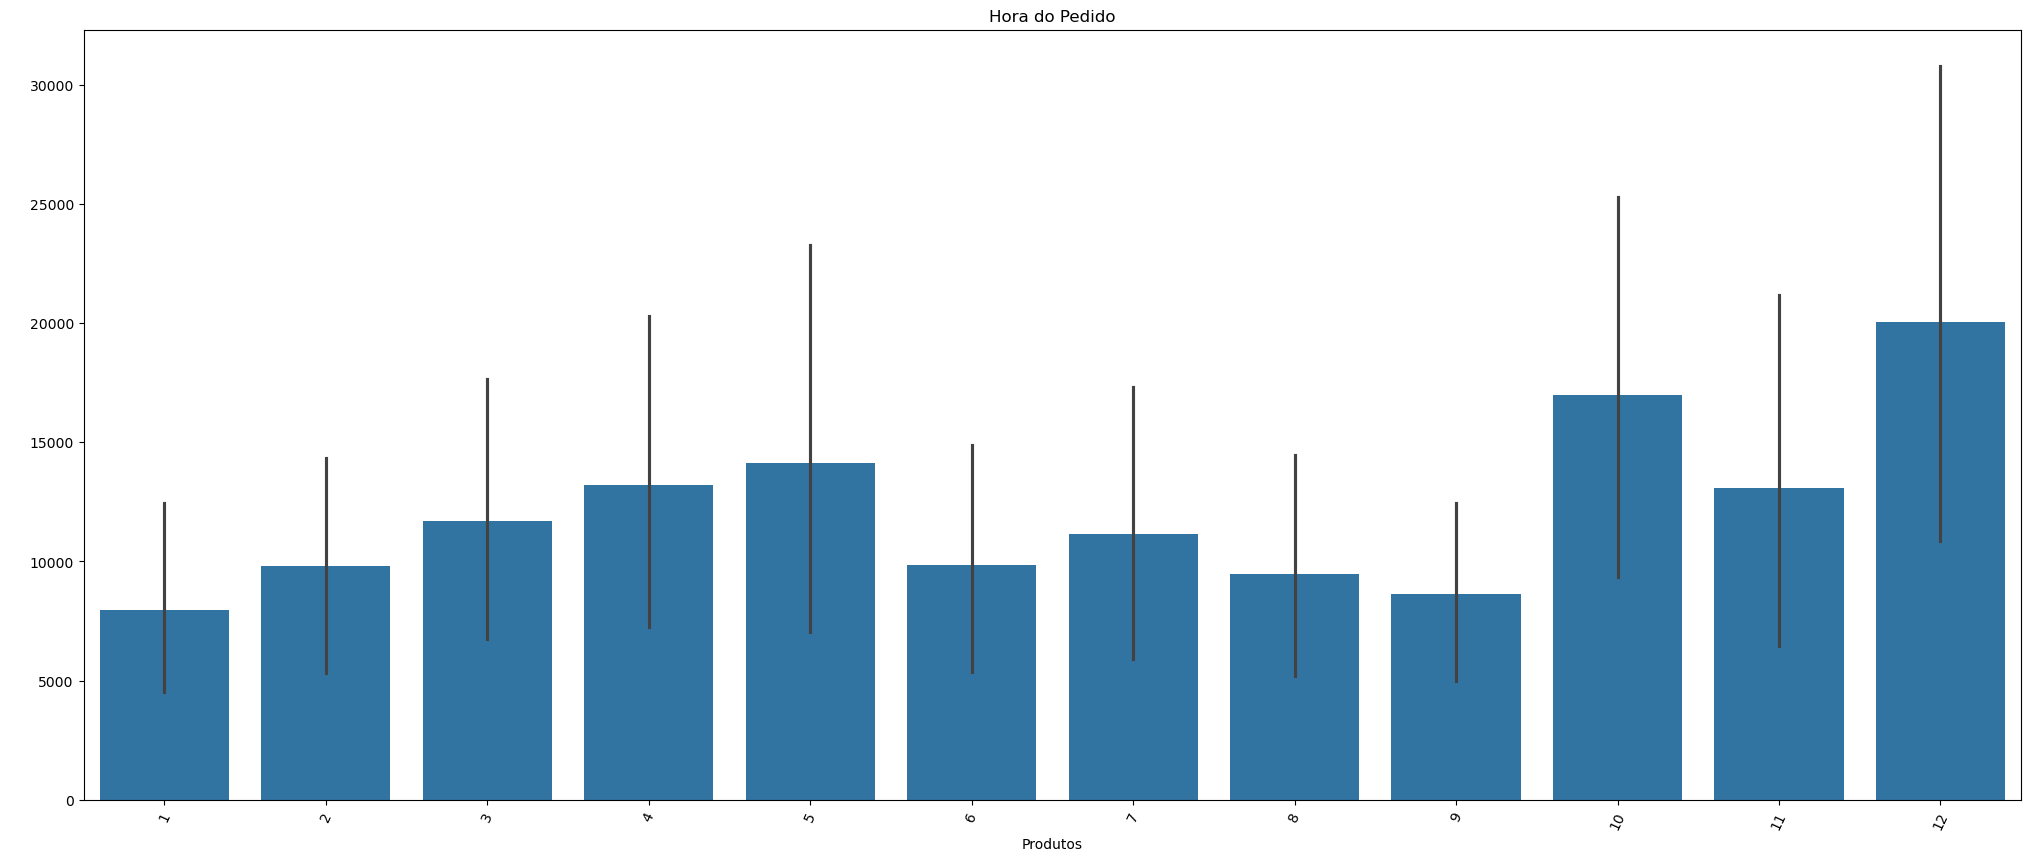

In [51]:
# Separando os dados de DALLAS
# Isso mostra quantos pedidos teve em cada hora de cada produto

plt.figure(figsize=(25,10))
sns.barplot(x = 'Month', y = 'Sales',data= dallas_novo) #  hue = "Quantity Ordered" ,
plt.title("Hora do Pedido")
plt.xlabel("Produtos")
plt.ylabel(" ")
plt.xticks(rotation = 65)


In [29]:
# Agrupando por mes para ver qual o número de vendas no mes 
agrup_mes = arquivo.groupby(['Month', 'City']).agg({
    "Quantity Ordered": "sum",
    "Price Each" : "sum",
}).reset_index()


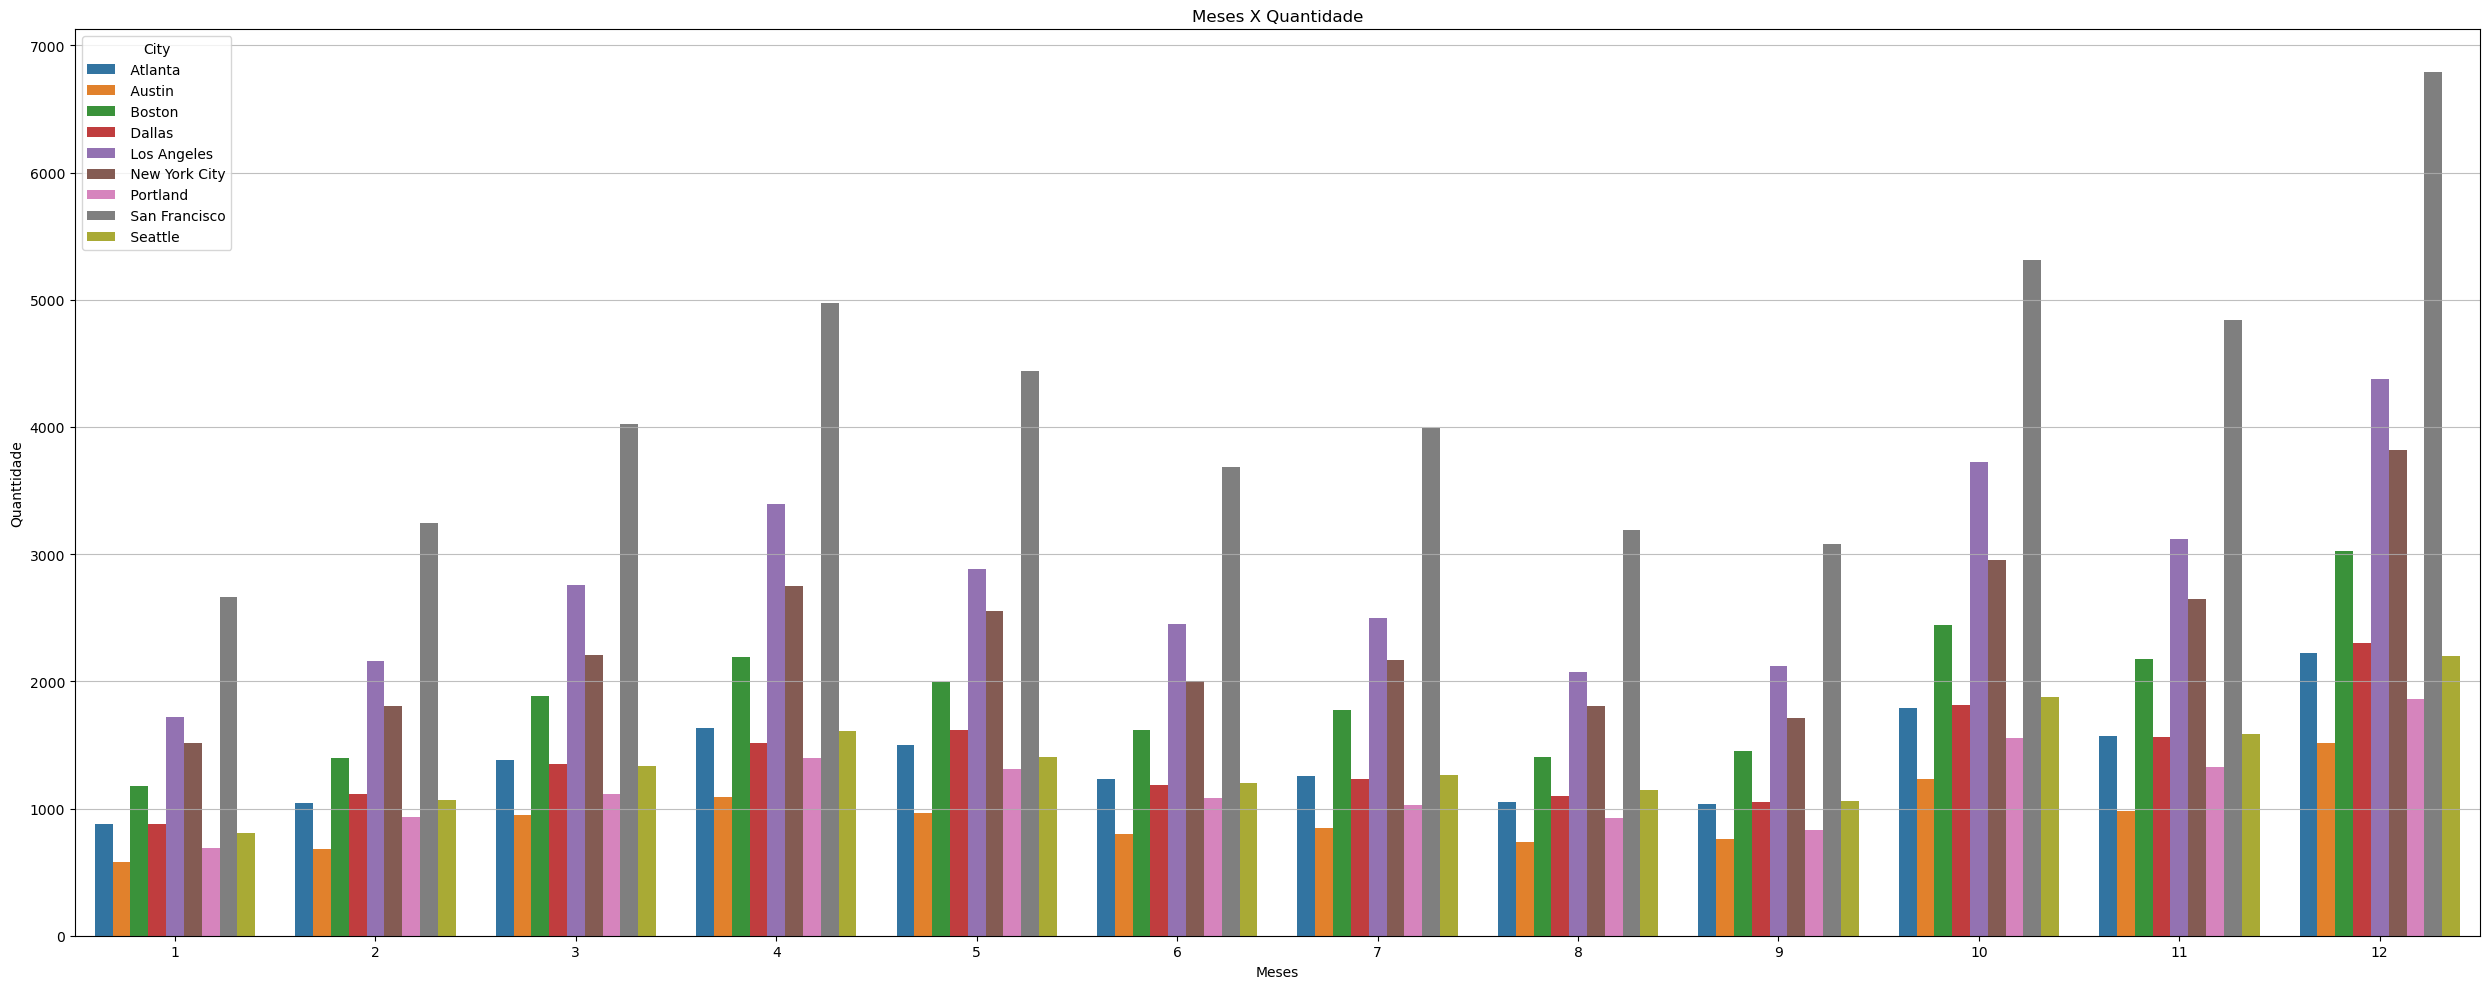

In [104]:
plt.figure(figsize=(25,10))
sns.barplot( x = "Month",
             y = "Quantity Ordered",
             hue = 'City',
            data= agrup_mes)
plt.title("Meses X Quantidade")
plt.xlabel("Meses")
plt.ylabel("Quanttidade")
# plt.xticks(rotation = 65)
plt.grid( alpha= 0.8, axis='y' )
plt.tight_layout()

In [22]:
# CALCULANDO A MEDIA DE VENDA MENSAL PARA A CIDADE DE DALLAS 
dallas = agrup_mes[ agrup_mes['City'] == " Dallas"]
media = agrup_mes['Quantity Ordered'].mean()
media

1935.9166666666667

In [23]:
# Agrupando por hora para ver qual o número de vendas por hora  
agrup_hora = arquivo.groupby(['Hour', 'City']).agg({
    "Quantity Ordered": "sum",
    "Price Each" : "sum",
}).reset_index()
agrup_hora

,Hour,City,Quantity Ordered,Price Each
0,0,Atlanta,357,62435.44
1,0,Austin,218,37852.87
2,0,Boston,507,76986.99
3,0,Dallas,328,44882.19
4,0,Los Angeles,702,105721.57
...,...,...,...,...
211,23,Los Angeles,1131,208828.50
212,23,New York City,925,151263.00
213,23,Portland,437,72345.54
214,23,San Francisco,1660,265189.72


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

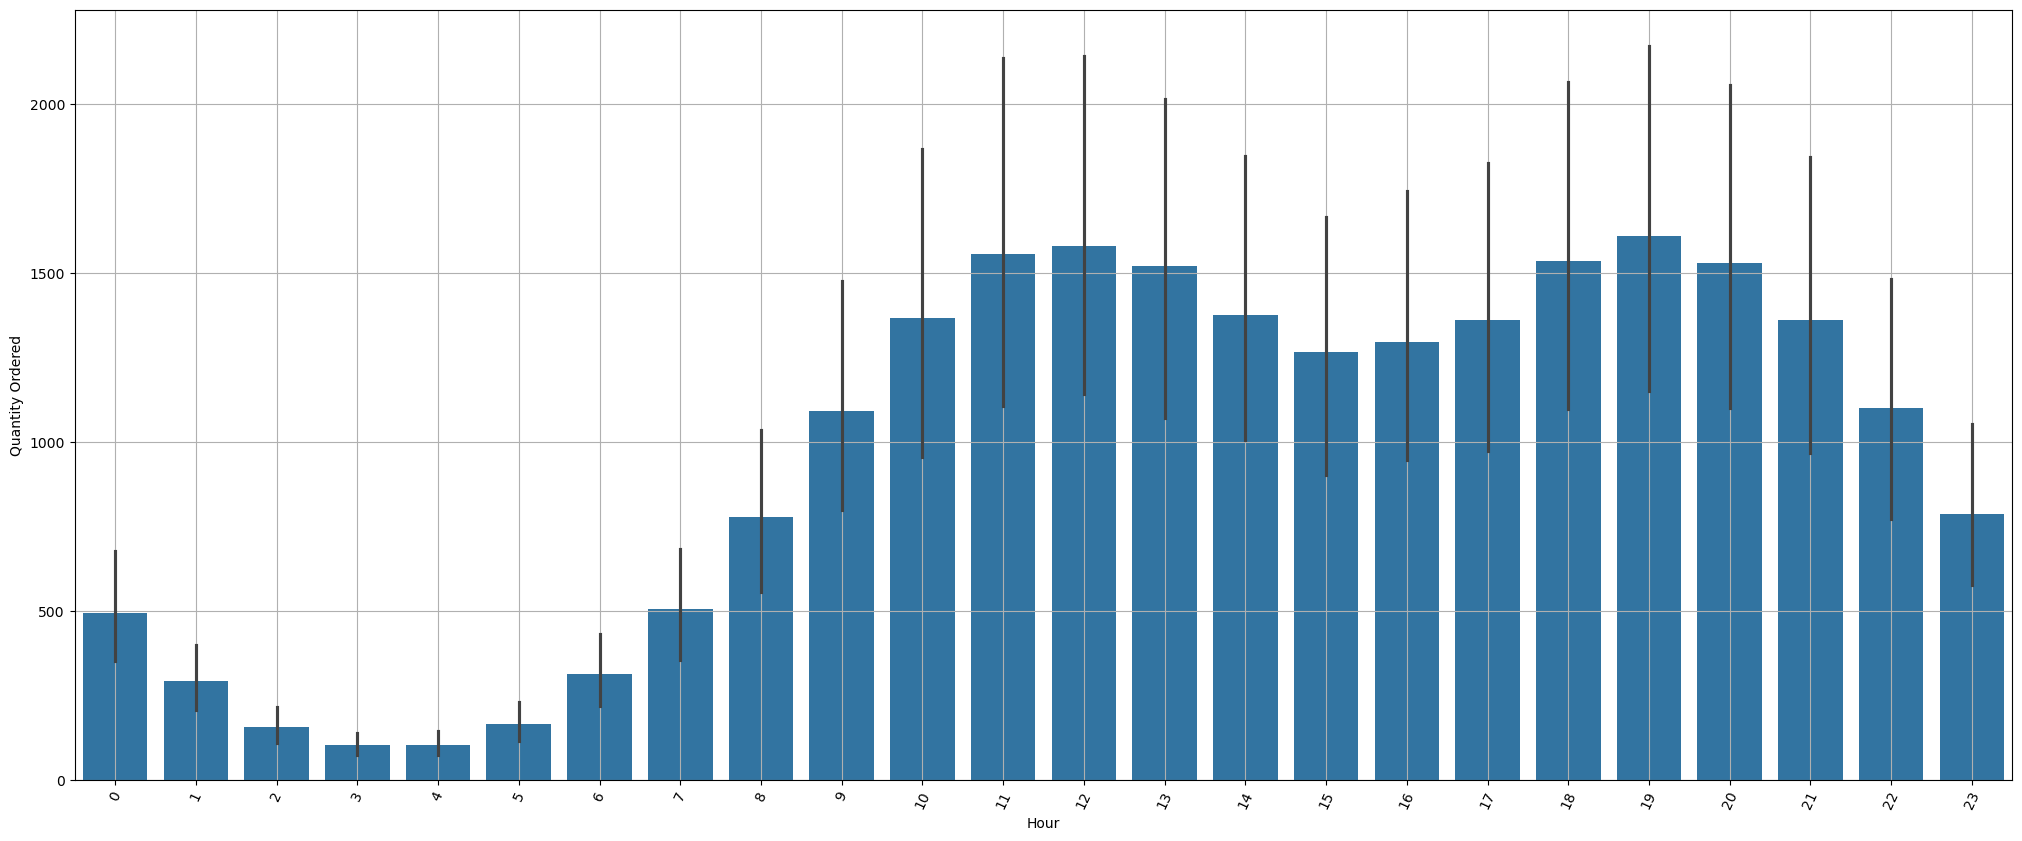

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot( x = "Hour",
             y = "Quantity Ordered",
            #  hue = 'City',
            data= agrup_hora)
plt.grid(True)
plt.title("Hora x Número de pedidos")
plt.xlabel("Hora")
plt.ylabel(" Quantidade ")
plt.xticks(rotation = 65)

O horário que tem mais vendas é  as 19 horas   